In [1]:
#패키지 불러오기 
import pandas as pd 
#데이터 시각화
import matplotlib.pyplot as plt
import matplotlib
#데이터 scaling
from sklearn.preprocessing import StandardScaler
#데이터 분할;train,test
from sklearn.model_selection import train_test_split
#분류SVM
from sklearn.svm import SVC
#최적 모델, 파라미터 검색
from sklearn.model_selection import GridSearchCV
#모델 성능 평가
from sklearn.metrics import confusion_matrix

유방암 결과를 분류하는 서포트 벡터 머신 모델을 만들고 predict method를 이용하여 목표변수 범주를 예측하라. 그리고 모델의 정확도와 confusion matrix를 구하라.
데이터 : 유방암.CSV(변수: 31개, 자료 수: 569개)
 -.목표변수(diagnosis, 0: Malignant(악성,357개), 1: Benign(양성,212개) 
        
※ 데이터는 ( train(0.4) : validation(0.3) : test(0.3) )의 비율로 분할 (train_test_split 활용)

 0. train_test_split 함수를 이용하여 train:test로 데이터 분할. 분할된 train 데이터를 재 분할하여 validation 데이터로 사용
 1. train 데이터: 모델 훈련 
 2. validation 데이터: 최적의 parameter 찾기(과정의 [연습/실습]에서 test 데이터 역할)
 3. test 데이터: 2에서 찾은 최적의 parameter를 이용하여 만든 모델로 최종 성능 확인(단 한 번만 사용할 것)

# 서포트벡터머신

In [120]:
df_raw = pd.read_csv("data/유방암.csv",engine = "python")
df_raw.head()

,diagnosis,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [121]:
df_raw.shape

(569, 31)

In [122]:
df_raw.isnull().sum()

diagnosis                  0
mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

In [143]:
# df_raw.boxplot()

In [144]:
df_raw_x =df_raw.drop("diagnosis",axis=1, inplace=False)
df_raw_y =df_raw["diagnosis"]

In [145]:
# 데이터분할 4:3:3
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x,df_raw_y,test_size = 3/10,random_state =1234)
df_train_x, df_val_x, df_train_y, df_val_y = train_test_split(df_train_x,df_train_y,test_size = 3/7,random_state =1234)

print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))
print("val data X size : {}".format(df_val_x.shape))
print("val data Y size : {}".format(df_val_y.shape))
print("test data X size : {}".format(df_test_x.shape))
print("test data Y size : {}".format(df_test_y.shape))

train data X size : (227, 30)
train data Y size : (227,)
val data X size : (171, 30)
val data Y size : (171,)
test data X size : (171, 30)
test data Y size : (171,)


In [146]:
svm_uncustomized =SVC(random_state=1234)
svm_uncustomized.fit(df_train_x,df_train_y)

print("Accuracy on training set : {:.3f}".format(svm_uncustomized.score(df_train_x, df_train_y)))
print("Accuracy on val set : {:.3f}".format(svm_uncustomized.score(df_val_x, df_val_y)))

Accuracy on training set : 0.912
Accuracy on val set : 0.901


In [147]:
svm_uncustomized

SVC(random_state=1234)

In [296]:
#C; 규제에 대한 강도 변경
#train 및 test 정확도 결과 저장용
train_accuracy =[]; val_accuracy=[]
#lc; 규제 (0.01,0.1,1,10)
# para_c=[0.1 * c for c in range(1,10)]
para_c=[10**c for c in range(-2,2)]
for v_C in para_c:
    svm=SVC(C=v_C,random_state=1234)
    svm.fit(df_train_x,df_train_y)
    train_accuracy.append(svm.score(df_train_x,df_train_y))
    val_accuracy.append(svm.score(df_val_x,df_val_y))
#데이터 테이블로 저장 
df_accuracy_c=pd.DataFrame()
df_accuracy_c["C"]=para_c
df_accuracy_c["TrainAccuracy"]=train_accuracy
df_accuracy_c["ValAccuracy"]=val_accuracy

In [297]:
#C별 정확도
df_accuracy_c.round(3)

,C,TrainAccuracy,ValAccuracy
0,0.01,0.630,0.637
1,0.10,0.899,0.889
2,1.00,0.912,0.901
3,10.00,0.930,0.924


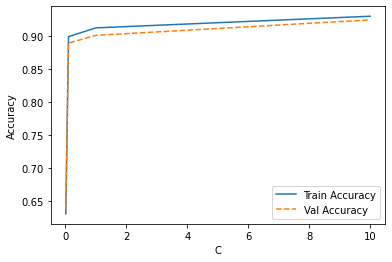

In [298]:
#C별 정확도 그래프로 확인
plt.plot(para_c,train_accuracy,linestyle="-",label="Train Accuracy")
plt.plot(para_c,val_accuracy,linestyle="--",label="Val Accuracy")
plt.ylabel("Accuracy"); plt.xlabel("C")
plt.legend()

C 값으로 train data의 정확도와 test data의 정확도의 차이가 적으며 정확도가 높은 1로 정함. 

In [254]:
#Gamma: 훈련 샘플이 미치는 영향의 범위를 변경
train_accuracy =[]; val_accuracy=[]
#lc; 규제 (0.01,0.1,1,10)
para_gamma=[10**gamma for gamma in range(-2,2)]
for v_gamma in para_gamma:
    svm=SVC(gamma=v_gamma,C=1 ,random_state=1234)
    svm.fit(df_train_x,df_train_y)
    train_accuracy.append(svm.score(df_train_x,df_train_y))
    val_accuracy.append(svm.score(df_val_x,df_val_y))
#데이터 테이블로 저장 
df_accuracy_gamma=pd.DataFrame()
df_accuracy_gamma["gamma"]=para_gamma
df_accuracy_gamma["TrainAccuracy"]=train_accuracy
df_accuracy_gamma["ValAccuracy"]=val_accuracy

In [255]:
#gamma별 정확도 테이블
df_accuracy_gamma.round(3)

,gamma,TrainAccuracy,ValAccuracy
0,0.01,1.0,0.637
1,0.10,1.0,0.637
2,1.00,1.0,0.637
3,10.00,1.0,0.637


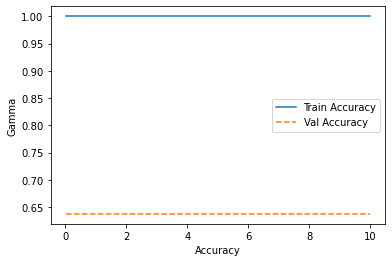

In [256]:
#Gamma별 정확도 그래프로 확인
plt.plot(para_gamma,train_accuracy,linestyle="-",label="Train Accuracy")
plt.plot(para_gamma,val_accuracy,linestyle="--",label="Val Accuracy")
plt.xlabel("Accuracy"); plt.ylabel("Gamma")
plt.legend()

gamma : 가까이 있는 데이터에 영향을 더 많이 주는 정도를 의미.  
위 그래프의 경우에서는, gamma는 정확도에 영향을 주지 않음을 볼 수 있다.

의사결정나무, 랜덤포레스트, 그레디언트 부스트등과 달리 svm 은 목표변수와 설명변수간에 영향을 주는 요인을 비교할때, 설명변수들과을 한번에 목표변수와 비교한다.  
그렇기에 설명변수들의 scale에 영향을 많이 받기에 SCALE변환이 필요함.

### step2: scale 변환

In [257]:
v_feature_name = df_train_x.columns
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_raw_x)
df_scaled = pd.DataFrame(df_scaled, columns = v_feature_name)
df_scaled.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [258]:
df_scaled_train_x, df_scaled_test_x = train_test_split(df_scaled, test_size = 0.3,
                                                     random_state = 1234)
df_scaled_train_x, df_scaled_val_x = train_test_split(df_scaled_train_x, test_size = 3/7,
                                                     random_state = 1234)
print("train data X size : {}".format(df_scaled_train_x.shape))
print("val data X size : {}".format(df_scaled_val_x.shape))
print("test data X size:{}".format(df_scaled_test_x.shape))

train data X size : (227, 30)
val data X size : (171, 30)
test data X size:(171, 30)


### step2: scale 조절 후 SVC 모델 재실행

In [259]:
svm_scaled = SVC(random_state = 1234)
svm_scaled.fit(df_scaled_train_x, df_train_y)
print("Accuracy on training set:{:.3f}".format(svm_scaled.score(df_scaled_train_x, df_train_y)))
print("Accuracy on val set:{:.3f}".format(svm_scaled.score(df_scaled_val_x, df_val_y)))

Accuracy on training set:0.996
Accuracy on val set:0.977


### step2: 새로운 SVC 모델 Parameter 변경

In [291]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; val_accuracy = []
# c: 규제(0.01, 0..1, 1, 10)
para_c = [0.1 * c for c in range(1, 11)]
# para_c = [10 ** c for c in range(-2, 2)]
for v_C in para_c:
    svm = SVC(C=v_C, random_state=1234)
    svm.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(svm.score(df_scaled_train_x, df_train_y))
    val_accuracy.append(svm.score(df_scaled_val_x, df_val_y))
# 데이터 테이블로 저장
df_accuracy_c = pd.DataFrame()
df_accuracy_c["C"] = para_c
df_accuracy_c["TrainAccuracy"] = train_accuracy
df_accuracy_c["ValAccuracy"] = val_accuracy

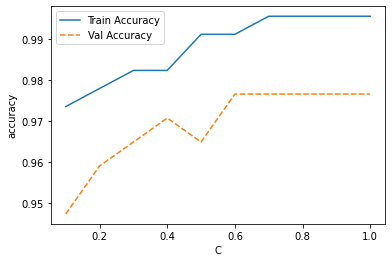

In [292]:
# C별 정확도 테이블
df_accuracy_c.round(3)
# 모델 정확도 그래프 확인
plt.plot(para_c, train_accuracy, linestyle="-", label="Train Accuracy")
plt.plot(para_c, val_accuracy, linestyle="--", label="Val Accuracy")
plt.ylabel("accuracy"); plt.xlabel("C")
plt.legend()

C 값으로 train data의 정확도와 test data의 정확도의 차이가 적으며 정확도가 높은 1로 정함. 

In [301]:
#새로운 SVC 모델 파라미터 변경
#Gamma 훈련 샘플이 미치는 영향의 범위를 변경 결과
#train 및 test정확도 결과 저장용
train_accuracy=[];val_accuracy=[]
#gamma: 규제(0.01 , 0.1 , 1, 10)

para_gamma=[0.1 * gamma for gamma in range(1,11)]
# para_gamma=[10 **gamma for gamma in range(-2,2)]

for v_gamma in para_gamma:
    svm=SVC(gamma=v_gamma,C = 1,random_state=1234)
    svm.fit(df_scaled_train_x,df_train_y)
    train_accuracy.append(svm.score(df_scaled_train_x,df_train_y))
    val_accuracy.append(svm.score(df_scaled_val_x,df_val_y))
#데이터 테이블로 저장
df_accuracy_gamma=pd.DataFrame()
df_accuracy_gamma['gamma']=para_gamma
df_accuracy_gamma['TrainAccuracy']=train_accuracy
df_accuracy_gamma['ValAccuracy']=val_accuracy

### step2: 새로운 SVC 모델 평가

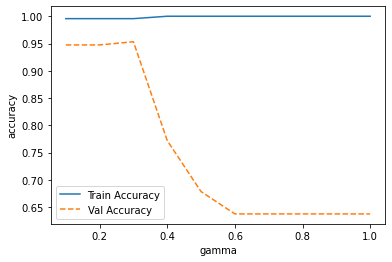

In [302]:
# Gamma 별 정확도 테이블
df_accuracy_gamma.round(3)
# Gamma 별 정확도 그래프로 확인
plt.plot(para_gamma, train_accuracy, linestyle = "-", label = 'Train Accuracy')
plt.plot(para_gamma, val_accuracy, linestyle = '--', label = 'Val Accuracy')
plt.ylabel('accuracy'); plt.xlabel('gamma')
plt.legend()


gamma의 값이 클수록 가까이 있는 데이터에 가중치를 많이 주게 된다.   
위 그래프에서 gamma가 커질수록 train data에 과적합됨을 볼수있다.  
따라서 train과 validation의 정확도 차이가 낮은 0.3이하로 gamma값으로 정해야함을 생각했음.

### step3: 결론 도출

In [294]:
# 최종 모델 gamma = 0.1로 둔 경우 
svc_final = SVC(gamma = 0.1,C = 1, random_state = 1234)
svc_final.fit(df_scaled_train_x, df_train_y)
# 평가
y_pred = svc_final.predict(df_scaled_test_x)
# train 데이터 셋 정확도
print("Accuracy on training set: {:.3f}" .format(svc_final.score(df_scaled_train_x, df_train_y)))
# test 데이터 셋 정확도
print("Accuracy on test set: {:.3f} \n" .format(svc_final.score(df_scaled_test_x, df_test_y)))
# confusion matrix
print("Confusion matrix: \n {}" .format(confusion_matrix(df_test_y, y_pred)))

Accuracy on training set: 0.996
Accuracy on test set: 0.918 

Confusion matrix: 
 [[99  6]
 [ 8 58]]


In [285]:
# 최종 모델 gamma = 0.045로 둔 경우 
svc_final = SVC(gamma = 0.045 ,C = 1, random_state = 1234)
svc_final.fit(df_scaled_train_x, df_train_y)
# 평가
y_pred = svc_final.predict(df_scaled_test_x)
# train 데이터 셋 정확도
print("Accuracy on training set: {:.3f}" .format(svc_final.score(df_scaled_train_x, df_train_y)))
# test 데이터 셋 정확도
print("Accuracy on test set: {:.3f} \n" .format(svc_final.score(df_scaled_test_x, df_test_y)))
# confusion matrix
print("Confusion matrix: \n {}" .format(confusion_matrix(df_test_y, y_pred)))

Accuracy on training set: 0.996
Accuracy on test set: 0.942 

Confusion matrix: 
 [[103   2]
 [  8  58]]


C = 1, gamma = 0.045 로 둔 경우,  
테스트셋의 정확도 = 0.942 (=94.2%)  
정분류율 = (103 + 25)/(103 + 2 + 8 + 58) = 0.941 (=94.1%)    
오분류율 = 1 - 0.941 = 0.059 (=5.9%)  
F1 Score = 2 / {(1/정밀도)+(1/재현율)}= 2 / { (1/ (58/60)) + (1/ (58/66)) }   
=0.922(=92.2%)